<a href="https://colab.research.google.com/github/NilaabhKeshav/Clustering/blob/master/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In [ ]:
#In this code, we are only taking two columns so that we can visualize the model clearly on a plot.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

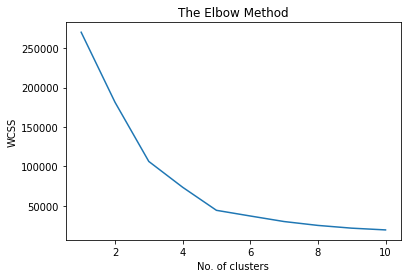

In [4]:
from sklearn.cluster import KMeans
wcss = [] #List so that it can be directly entered into the plot() method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#inertia_ provides wcss values for corr. object
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")    
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)#fit_predict() trains as well as returns the dependent variable that we want to create

In [8]:
print(y_kmeans)#shows each data point belongs to which cluster

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [9]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


## Visualising the clusters

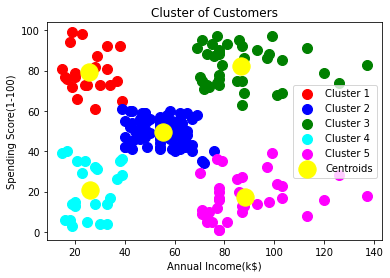

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#cluster_centers_ contains a matrix with rows as centroids and columns as their coordinates
plt.title("Cluster of Customers")    
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()